In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME ='computer vision'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
%cd drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/computer vision


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
print(train.shape)
print(test.shape)

(858, 2)
(215, 1)


Data Visualization and Preprocessing

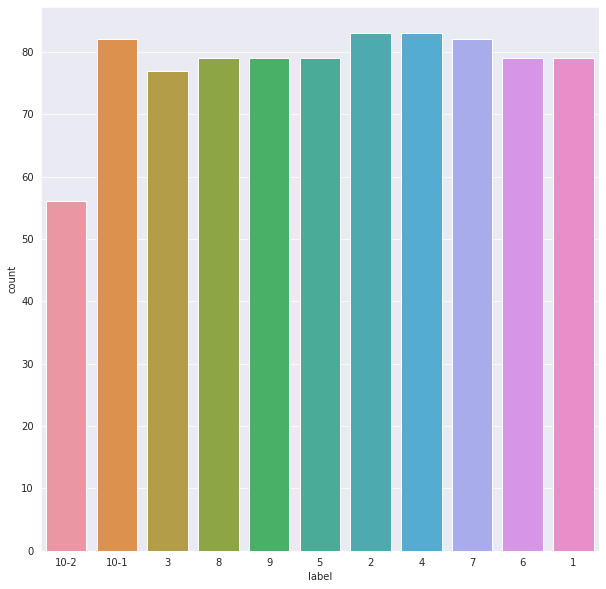

In [4]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(train['label'])
#충분히 balance해보임

In [5]:
train.isna().sum()

file_name    0
label        0
dtype: int64

이미지 불러오기

In [6]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
from tqdm import tqdm
img_arrays=[]
for file in tqdm(train['file_name']):
    img=cv2.imread('train/'+file)
    img = cv2.resize(img, (64, 64))
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_arrays.append(np.array(img))
train_img=np.array(img_arrays)

 50%|█████     | 432/858 [01:51<01:32,  4.62it/s]

In [ ]:
img_arrays2=[]
for file in tqdm(test['file_name']):
    img=cv2.imread('test/'+file)
    img = cv2.resize(img, (64, 64))
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_arrays2.append(np.array(img))
test_img=np.array(img_arrays2)

In [ ]:
train_img.shape

In [ ]:
def convert_obj2int(obj):
  if obj=='10-1':
      obj='10'
  elif obj=='10-2':
      obj='0'
  else:
      obj
  return int(obj)
#모델링을 하기 위해 label을 정수형으로 수정해 주겠습니다.
#파이토치는 클래스의 인덱스 번호가 0부터 읽어들이기 때문에,
#10-1를 정수 10으로, 10를 정수 0으로 바꿔주고
#label 열의 타입을 int로 수정해 주겠습니다.

In [ ]:
train['label']=train['label'].apply(convert_obj2int)
train.head(3)

In [ ]:
#잘 불러와졌는지 보자
plt.figure(figsize=(12,10))

for n in range(0,11):  
    train_idx = train[train["label"] == n].tail(10).index
    for i, m in enumerate(train_idx):
        img = train_img[m]
        plt.subplot(11, 10, (n*10)+(i+1))  #행은 class수 열은 시각화할 개수
        plt.imshow(img, cmap=plt.cm.binary)
        plt.axis("off")

In [14]:
# for n in range(0,11):  
#     train_idx = train[train["label"] == n].index
#     print(f"label : {n}")
#     plt.figure(figsize=(12,30))
    
#     for i, m in enumerate(train_idx):
#         img = train_img[m]
#         plt.subplot(56, 21, (i+1)) 
#         plt.imshow(img)
#         plt.axis("off")
#     plt.show()    

In [ ]:
#train_img=train_img.reshape(-1,train_img.shape[1],train_img.shape[2],1)
train_img=train_img/255

In [ ]:
#test_img=test_img.reshape(-1,test_img.shape[1],test_img.shape[2],1)
test_img=test_img/255

In [ ]:
train_img.shape

In [ ]:
test_img.shape

In [19]:
# fig,axe=plt.subplots(2,2)
# fig.suptitle('Preview of dataset')
# axe[0,0].imshow(test_img[0].reshape(28,28),cmap='gray')
# axe[0,0].set_title('label: 3  letter: C')
# axe[0,1].imshow(test_img[1].reshape(28,28),cmap='gray')
# axe[0,1].set_title('label: 6  letter: F')
# axe[1,0].imshow(test_img[2].reshape(28,28),cmap='gray')
# axe[1,0].set_title('label: 2  letter: B')
# axe[1,1].imshow(test_img[4].reshape(28,28),cmap='gray')
# axe[1,1].set_title('label: 13  letter: M')

In [20]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(train_img,pd.get_dummies(train['label']),test_size=0.1,random_state=4)

In [21]:
from keras.utils.np_utils import to_categorical
y=train['label']
y=to_categorical(y)

###성능 개선을 위한 label smoothing

In [22]:
def smooth_labels(labels, factor=0.1):
	# smooth the labels
	labels *= (1 - factor)
	labels += (factor / labels.shape[1])
	# returned the smoothed labels
	return labels

In [23]:
smooth_labels(y)

array([[0.9090909 , 0.00909091, 0.00909091, ..., 0.00909091, 0.00909091,
        0.00909091],
       [0.00909091, 0.00909091, 0.00909091, ..., 0.00909091, 0.00909091,
        0.9090909 ],
       [0.00909091, 0.00909091, 0.00909091, ..., 0.00909091, 0.00909091,
        0.00909091],
       ...,
       [0.00909091, 0.00909091, 0.00909091, ..., 0.00909091, 0.00909091,
        0.00909091],
       [0.00909091, 0.00909091, 0.00909091, ..., 0.00909091, 0.00909091,
        0.9090909 ],
       [0.00909091, 0.00909091, 0.00909091, ..., 0.00909091, 0.00909091,
        0.00909091]], dtype=float32)

In [24]:

from sklearn.model_selection import KFold
kf = KFold(5)
for train_index, test_index in kf.split(train_img):
    X_train,X_test=train_img[train_index],train_img[test_index]
    y_train,y_test=y[train_index],y[test_index]
X_train.shape

(687, 64, 64, 3)

In [25]:
#전처리 파이프라인
def pipeline(df1,df2):
  def convert_obj2int(obj):
    if obj=='10-1':
        obj='10'
    elif obj=='10-2':
        obj='0'
    else:
        obj
    return int(obj)
  df1['label']=df1['label'].apply(convert_obj2int)
  img_arrays=[]
  for file in train['file_name']:
    img=Image.open('computer vision/train/'+file)
    img_arrays.append(np.array(img))
  train_img=np.array(img_arrays)
  img_arrays2=[]
  for file in test['file_name']:
    img=Image.open('computer vision/test/'+file)
    img_arrays2.append(np.array(img))
  test_img=np.array(img_arrays)
  X_train=train_img.reshape(-1,train_img.shape[1],train_img.shape[2],3)
  X_train=X_train/255
  y_train=df1['label']
  X_test=test_img.reshape(-1,test_img.shape[1],test_img.shape[2],3)
  X_test=X_test/255
  return X_train,y_train,X_test

##Data augumentation

In [26]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(train_img)

데이터 확대를 위해 다음을 선택했습니다.

일부 교육 이미지를 10도 랜덤으로 회전합니다. 10도 랜덤으로 확대/축소합니다. 일부 교육 이미지는 너비의 10%만큼 수평으로 임의로 이동합니다. 이미지의 높이를 10%만큼 수직으로 임의로 이동합니다. 분류가 잘못될 수 있으므로 vertical_flip 또는 horizontal_flip을 적용하지 않았습니다.

모델이 준비되면, 우리는 훈련 데이터 세트를 맞춘다.

##Modeling : Convolutional Neural Network

In [27]:
import tensorflow as tf
from tensorflow.keras import Sequential,layers,Input
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, Resizing
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score

In [28]:
from keras.callbacks import ReduceLROnPlateau  #https://deep-deep-deep.tistory.com/56
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=2,factor=0.5, min_lr=0.00001) # lr을 계속 절반으로 감소시킬것임

In [29]:
#model.save('saved_model')

In [30]:
#model.save('saved_model.h5')

In [31]:
loaded_model = tf.keras.models.load_model("saved_model")

loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 216)       6048      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 216)      864       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 216)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       248960    
                                                                 
 dropout (Dropout)           (None, 14, 14, 128)       0

##앙상블하려고 했는데 model1에서 100나와서 안함

In [32]:
model1 = Sequential()

model1.add(layers.Conv2D(32, (3, 3), input_shape = X_train.shape[1:], activation='relu'))
model1.add(layers.MaxPooling2D(pool_size = (2, 2)))
model1.add(layers.Dropout(0.2))

model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D(pool_size = (2, 2)))
model1.add(layers.Dropout(0.2))

model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D(pool_size = (2, 2)))
model1.add(layers.Dropout(0.2))

model1.add(layers.Flatten())

model1.add(layers.Dense(128, activation = 'relu'))
model1.add(layers.Dense(11, activation = 'softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [33]:
model1.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])
mod_res_1 = model1.fit(X_train,y_train, batch_size = 128, epochs = 50, verbose = 2, validation_data = (X_test, y_test))

Epoch 1/50
6/6 - 6s - loss: 2.4307 - accuracy: 0.0873 - val_loss: 2.3998 - val_accuracy: 0.0702 - 6s/epoch - 1s/step
Epoch 2/50
6/6 - 5s - loss: 2.3945 - accuracy: 0.1121 - val_loss: 2.3997 - val_accuracy: 0.1111 - 5s/epoch - 821ms/step
Epoch 3/50
6/6 - 5s - loss: 2.3921 - accuracy: 0.1164 - val_loss: 2.3991 - val_accuracy: 0.0936 - 5s/epoch - 806ms/step
Epoch 4/50
6/6 - 5s - loss: 2.3907 - accuracy: 0.1019 - val_loss: 2.3955 - val_accuracy: 0.1053 - 5s/epoch - 811ms/step
Epoch 5/50
6/6 - 5s - loss: 2.3851 - accuracy: 0.1194 - val_loss: 2.3944 - val_accuracy: 0.1404 - 5s/epoch - 806ms/step
Epoch 6/50
6/6 - 7s - loss: 2.3784 - accuracy: 0.1019 - val_loss: 2.3824 - val_accuracy: 0.0819 - 7s/epoch - 1s/step
Epoch 7/50
6/6 - 5s - loss: 2.3657 - accuracy: 0.1543 - val_loss: 2.3734 - val_accuracy: 0.1520 - 5s/epoch - 816ms/step
Epoch 8/50
6/6 - 5s - loss: 2.3244 - accuracy: 0.2111 - val_loss: 2.3024 - val_accuracy: 0.1696 - 5s/epoch - 811ms/step
Epoch 9/50
6/6 - 5s - loss: 2.2480 - accuracy:

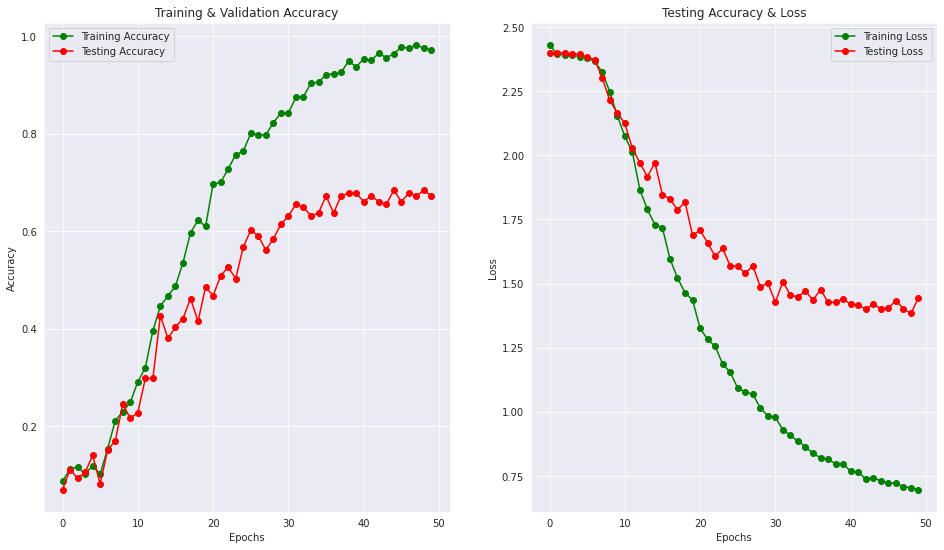

In [34]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = mod_res_1.history['accuracy']
train_loss = mod_res_1.history['loss']
val_acc = mod_res_1.history['val_accuracy']
val_loss = mod_res_1.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

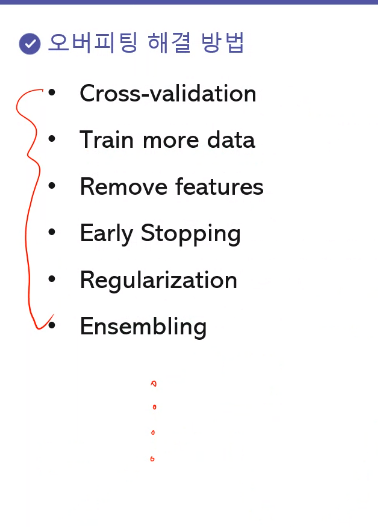

In [35]:
print("Accuracy of the model is - " , model1.evaluate(train_img[600:],y[600:])[1]*100 , "%")

9/9 [==============================] - 1s 55ms/step - loss: 1.1796 - accuracy: 0.7829
Accuracy of the model is -  78.29457521438599 %


#정확도 100% !!!

##전이학습

###ResNet50

In [36]:
from tensorflow.keras.applications import ResNet50
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, LambdaCallback
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

input = Input(shape=train_img[0].shape)
model = ResNet50(input_tensor=input, include_top=False, weights=None, pooling='max')

x = model.output
x = Dense(32, name='fully')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(64)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x=Dropout(0.5)(x)
x = Dense(11, activation='softmax', name='softmax')(x)
model = Model(model.input, x)
model.summary()

# train_datagen = ImageDataGenerator(rescale=1./255)#rgb값 reduce
# train_generator = train_datagen.flow_from_directory(
#         './train',
#         target_size=(112, 112),
#         batch_size=30,
#         class_mode='categorical')

# val_datagen = ImageDataGenerator(rescale=1./255)
# val_generator = val_datagen.flow_from_directory(
#         './test',
#         target_size=(112, 112),
#         batch_size=30,
#         class_mode='categorical')

model.compile(loss='categorical_crossentropy',
                  #optimizer=optimizers.RMSprop(lr=2e-4),
                  optimizer='adam',
                  metrics=['acc'])

print_weights = LambdaCallback(on_epoch_end=lambda epoch, logs: print(model.layers[3].get_weights()))
early_stopping = EarlyStopping(patience=3, mode='auto', monitor='val_acc')
history = model.fit(train_img,y,
                              epochs=40,
                              
                              validation_data=(X_test, y_test),
                              shuffle=True,
                              verbose=2
                              )

#모델 평가
print("-- Evaluate --")
scores = model.evaluate_generator(train_img[120:240], steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


"""
# Store the fully connected layers
fc1 = model.layers[-3]
fc2 = model.layers[-2]
predictions = model.layers[-1]s
# Create the dropout layers
dropout1 = Dropout(0.85)
dropout2 = Dropout(0.85)
# Reconnect the layers
x = dropout1(fc1.output)
x = fc2(x)
x = dropout2(x)
predictors = predictions(x)
# Create a new model
model2 = Model(inputs=model.input, outputs=predictors)
model2.summary()
"""

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

'\n# Store the fully connected layers\nfc1 = model.layers[-3]\nfc2 = model.layers[-2]\npredictions = model.layers[-1]s\n# Create the dropout layers\ndropout1 = Dropout(0.85)\ndropout2 = Dropout(0.85)\n# Reconnect the layers\nx = dropout1(fc1.output)\nx = fc2(x)\nx = dropout2(x)\npredictors = predictions(x)\n# Create a new model\nmodel2 = Model(inputs=model.input, outputs=predictors)\nmodel2.summary()\n'

TypeError: ignored

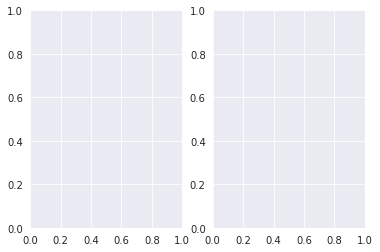

In [45]:
epochs = [i for i in range(40)]
fig , ax = plt.subplots(1,2)
train_acc = model1.history['accuracy']
train_loss = model1.history['loss']
val_acc = model1.history['val_accuracy']
val_loss = model1.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [46]:
model1.save('saved_model1')

INFO:tensorflow:Assets written to: saved_model1/assets


In [37]:
print("Accuracy of the model is - " , model.evaluate(train_img[800:1200],y[800:1200])[1]*100 , "%")

2/2 [==============================] - 1s 383ms/step - loss: 1.2785 - acc: 0.7241
Accuracy of the model is -  72.41379022598267 %


# 대체로 90%정도의 정확도를 보인다.

###Efficient B0 -> 왜 인지는 모르겠지만 10%이상 맞추지를 못한다.....

In [38]:
!pip install efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.9 MB/s 


In [39]:
import efficientnet.keras as efn
from keras.layers import GlobalAveragePooling2D

In [40]:
train_img[0].shape

(64, 64, 3)

In [41]:
efnb0 = efn.EfficientNetB0(weights=None, include_top=False, input_shape=train_img[0].shape, classes=11)

model = Sequential()
model.add(efnb0)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 2, 2, 1280)       4049564   
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_4 (Dropout)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 11)                14091     
                                                                 
Total params: 4,063,655
Trainable params: 4,021,639
Non-trainable params: 42,016
_________________________________________________________________


In [42]:
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
optimizer = Adam(lr=0.000001)

#early stopping to monitor the validation loss and avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

#reducing learning rate on plateau
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 2, factor= 0.5, min_lr= 1e-6, verbose=1)
#model compiling
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
model_history = model.fit(train_img,y, validation_data = (X_test,y_test),verbose = 2, epochs = 30)

Epoch 1/30
27/27 - 34s - loss: 2.6870 - accuracy: 0.1026 - val_loss: 2.4003 - val_accuracy: 0.0877 - 34s/epoch - 1s/step
Epoch 2/30
27/27 - 21s - loss: 2.6989 - accuracy: 0.0874 - val_loss: 2.4030 - val_accuracy: 0.0877 - 21s/epoch - 777ms/step
Epoch 3/30
27/27 - 21s - loss: 2.6949 - accuracy: 0.0851 - val_loss: 2.4056 - val_accuracy: 0.0877 - 21s/epoch - 782ms/step
Epoch 4/30
27/27 - 21s - loss: 2.6601 - accuracy: 0.0769 - val_loss: 2.4083 - val_accuracy: 0.0877 - 21s/epoch - 778ms/step
Epoch 5/30


KeyboardInterrupt: ignored

##제출하기

In [ ]:
preds=model1.predict(test_img)
result=[]
class_prediction=np.argmax(preds[0])
for i in range(0,len(test_img)):
    result.append(np.argmax(preds[i]))
print(result)

In [ ]:
submission=pd.read_csv('sample_submission.csv')


In [ ]:
submission['label']=result
submission

In [ ]:
submission['label'][submission['label'] == 10] = '10-1' ## label : 10 -> '10-1'
submission['label'][submission['label'] == 0] = '10-2' ## Label : 0 -> '10-2'
submission['label'] = submission['label'].apply(lambda x : str(x))

In [ ]:
print(submission.head())
print(submission.tail())

In [ ]:
submission.to_csv('fin_submit.csv',index=False)